(600, 1000)


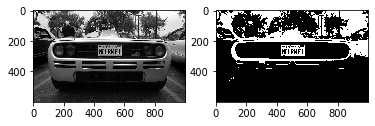

Rectangle(xy=(424, 227), width=156, height=74, angle=0)


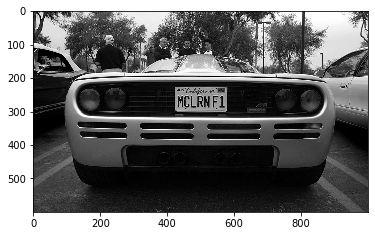

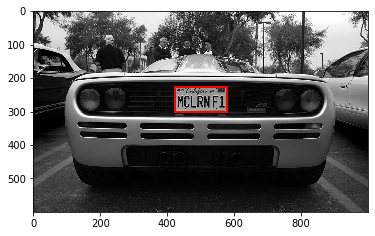

In [21]:
import cv2
import imutils
from skimage.io import imread
from skimage.filters import threshold_otsu
import matplotlib.pyplot as plt

filename = './car.png'

# # descomentar para leer video
#cap = cv2.VideoCapture(0)
#cap = cv2.VideoCapture(filename)
# count = 0
# while cap.isOpened() and count < 180:
#     ret,frame = cap.read()
#     if ret == True:
#         cv2.imshow('window-name',frame)
#         cv2.imwrite("./output/frame%d.jpg" % count, frame)
#         count = count + 1
#         if cv2.waitKey(10) & 0xFF == ord('q'):
#             break
#     else:
#         break
# cap.release()
# cv2.destroyAllWindows()


# descomentar para leer video por camara
#car_image = imread("./output/frame%d.jpg"%(count-1), as_gray=True)
car_image = imread(filename, as_gray=True)
#car_image = imutils.rotate(car_image, 270)
# car_image = imread("car.png", as_gray=True)
# it should be a 2 dimensional array
print(car_image.shape)


# teniendo un rango ente  0 & 255 

gray_car_image = car_image * 255
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(gray_car_image, cmap="gray")
threshold_value = threshold_otsu(gray_car_image)
binary_car_image = gray_car_image > threshold_value
# print(binary_car_image)
ax2.imshow(binary_car_image, cmap="gray")
# ax2.imshow(gray_car_image, cmap="gray")
plt.show()

# buscando regiones conectadas de la imagen binarizada mediante el algoritmo CCA(conected component analysis) 


from skimage import measure
from skimage.measure import regionprops
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# obtener todas las regiones conectadas y agruparlas
label_image = measure.label(binary_car_image)

# print(label_image.shape[0]) #ancho de la imagen del carro

# obteniendo el minimo alto y  maximo  alto, minimo ancho, maximo ancho respectivamente que una placa de licencia puede tener
plate_dimensions = (0.06*label_image.shape[0], 0.07*label_image.shape[0], 0.10*label_image.shape[1], 0.21*label_image.shape[1])
plate_dimensions2 = (0.08*label_image.shape[0], 0.2*label_image.shape[0], 0.15*label_image.shape[1], 0.4*label_image.shape[1])
plate_dimensions = (0.04*label_image.shape[0], 0.07*label_image.shape[0], 0.09*label_image.shape[1], 0.18*label_image.shape[1])
plate_dimensions2 = (0.08*label_image.shape[0], 0.2*label_image.shape[0], 0.15*label_image.shape[1], 0.4*label_image.shape[1])

min_height, max_height, min_width, max_width = plate_dimensions
plate_objects_cordinates = []
plate_like_objects = []

fig, (ax1) = plt.subplots(1)
ax1.imshow(gray_car_image, cmap="gray")
flag = 0
# crea una lista de propiedades de todas las regiones que obtiene el CCA
for region in regionprops(label_image):
    if region.area < 180:
        #si la region es muy pequena entonces no es una placa de licencia
        continue
    # obteniendo las coordenadas de los 4 puntos que delimitan la region
    min_row, min_col, max_row, max_col = region.bbox
    # print(min_row)
    # print(min_col)
    # print(max_row)
    # print(max_col)

    #calculando el alto de la region
    region_height = max_row - min_row
    #calculando el ancho de la region
    region_width = max_col - min_col
    # print(region_height)
    #print(region_width)

    # asegurandonos que la region cumple con las suposiciones de el tamano que puede tener la placa de licencia
    if region_height >= min_height and region_height <= max_height and region_width >= min_width and region_width <= max_width and region_width > region_height :
        flag = 1
        plate_like_objects.append(gray_car_image[min_row:max_row,
                                  min_col:max_col])
        plate_objects_cordinates.append((min_row, min_col,
                                         max_row, max_col))
        rectBorder = patches.Rectangle((min_col, min_row), max_col - min_col, max_row - min_row, edgecolor="red",
                                       linewidth=2, fill=False)
        ax1.add_patch(rectBorder)
        print(rectBorder)
        #dibujando un rectangulo sobre esta region
if(flag == 1):
    # print(plate_like_objects[0])
    plt.show()


if(flag==0):
    min_height, max_height, min_width, max_width = plate_dimensions2
    plate_objects_cordinates = []
    plate_like_objects = []

    fig, (ax1) = plt.subplots(1)
    ax1.imshow(gray_car_image, cmap="gray")

    # crea una lista de propiedades de todas las regiones que obtiene el CCA
    for region in regionprops(label_image):
        if region.area < 180:
            #si la region es muy pequena entonces no es una placa de licencia
            continue
        # obteniendo las coordenadas de los 4 puntos que delimitan la region
        min_row, min_col, max_row, max_col = region.bbox
        # print(min_row)
        # print(min_col)
        # print(max_row)
        # print(max_col)

        region_height = max_row - min_row
        region_width = max_col - min_col
        # print(region_height)
        #print(region_width)

        # asegurandonos que la region cumple con las suposiciones de el tamano que puede tener la placa de licencia
        if region_height >= min_height and region_height <= max_height and region_width >= min_width and region_width <= max_width and region_width > region_height:
            plate_like_objects.append(gray_car_image[min_row:max_row,
                                      min_col:max_col])
            plate_objects_cordinates.append((min_row, min_col,
                                             max_row, max_col))
            rectBorder = patches.Rectangle((min_col, min_row), max_col - min_col, max_row - min_row, edgecolor="red",
                                           linewidth=2, fill=False)
            ax1.add_patch(rectBorder)
            print(rectBorder)
    #print(plate_like_objects[0])
    plt.show()

fabigorn ic

NCLRN Fl


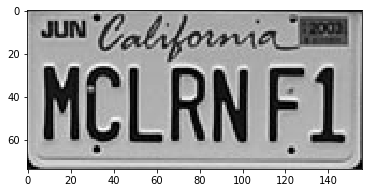

In [22]:
from PIL import Image
import pytesseract
from PIL import Image
#utilizando la red neural de google para realizar el reconocimiento de caracteres de la licencia una vez detectada la region que corresponde a la licencia en la imagen
text = pytesseract.image_to_string(plate_like_objects[0], config='-l eng --oem 3 --psm 12')
#mostrando la imagen que corresponde a la region obtenida por el CCA de acuerdo a los criterios definidos
plt.imshow(plate_like_objects[0], cmap="gray")
#mostrando el texto detectado por la red neural
print (text)
